In [306]:
import pandas as pd

In [307]:
import matplotlib.pyplot as plt
import scienceplots
# plt.style.use(['default'])
# plt.style.use(['science', 'notebook', 'bright'])
plt.style.use(['science', 'notebook', 'muted'])

# plt.style.use(['science', 'notebook', 'grid'])

plt.rcParams['text.usetex'] = False

In [308]:
import pathlib

In [309]:
import h5py

In [310]:
import prim.waveform

In [311]:
import tqdm

In [312]:
hybrid_data_dir = pathlib.Path("/scratch/sebastian.khan/data/ppmHM_2024_11_11")

In [315]:
hybrid_files = list(hybrid_data_dir.glob("*.h5"))

In [316]:
len(hybrid_files)

3134

In [317]:
df = pd.read_csv("/scratch/sebastian.khan/data/ppmHM_2024_11_11/metadata.csv")

In [318]:
df.shape

(3134, 15)

In [320]:
df

approximant     chi1z     chi2z  is_reference  \
0        SEOBNRv5HM -0.400075 -0.799056          True   
1        SEOBNRv5HM  0.390150 -0.479875         False   
2        SEOBNRv5HM  0.899737  0.899737         False   
3        SEOBNRv5HM -0.775210 -0.799591         False   
4        SEOBNRv5HM -0.600309  0.799911         False   
...             ...       ...       ...           ...   
3129  SEOBNRv4HM_PA -0.399917  0.799417         False   
3130  SEOBNRv4HM_PA -0.000025 -0.400096         False   
3131  SEOBNRv4HM_PA  0.199951 -0.000052         False   
3132     SEOBNRv5HM -0.603632 -0.752452         False   
3133  SEOBNRv4HM_PA -0.599968 -0.000010         False   

                                                  modes         q  \
0     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.997690   
1     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.203005   
2                       [[2 2]\n [3 2]\n [4 4]\n [5 4]]  1.000000   
3     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.329659   
4     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.249881   
...                                                 ...       ...   
3129  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.998540   
3130  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.250001   
3131  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.000000   
3132  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  7.997162   
3133  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.000019   

           sxs_sim_name                                           filepath  \
0     SXS:BBH:2212/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
1     SXS:BBH:0312/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
2     SXS:BBH:0160/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3     SXS:BBH:1471/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
4     SXS:BBH:0503/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
...                 ...                                                ...   
3129  SXS:BBH:2209/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3130  SXS:BBH:0464/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3131  SXS:BBH:0366/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3132  SXS:BBH:1423/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3133  SXS:BBH:2090/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   

                           hybrid_name  q_rounded  chi1z_rounded  \
0        SXS_BBH_2212-Lev3__SEOBNRv5HM      5.998         -0.400   
1        SXS_BBH_0312-Lev2__SEOBNRv5HM      1.203          0.390   
2        SXS_BBH_0160-Lev3__SEOBNRv5HM      1.000          0.900   
3        SXS_BBH_1471-Lev3__SEOBNRv5HM      1.330         -0.775   
4        SXS_BBH_0503-Lev2__SEOBNRv5HM      1.250         -0.600   
...                                ...        ...            ...   
3129  SXS_BBH_2209-Lev3__SEOBNRv4HM_PA      5.999         -0.400   
3130  SXS_BBH_0464-Lev2__SEOBNRv4HM_PA      1.250         -0.000   
3131  SXS_BBH_0366-Lev3__SEOBNRv4HM_PA      1.000          0.200   
3132     SXS_BBH_1423-Lev2__SEOBNRv5HM      7.997         -0.604   
3133  SXS_BBH_2090-Lev3__SEOBNRv4HM_PA      1.000         -0.600   

      chi2z_rounded   chi_eff  chi_eff_rounded   ID  
0            -0.799 -0.457091          -0.4571    0  
1            -0.480 -0.004776          -0.0048  256  
2             0.900  0.899737           0.8997  322  
3            -0.800 -0.785675          -0.7857   42  
4             0.800  0.022044           0.0220  196  
...             ...       ...              ...  ...  
3129          0.799 -0.228548          -0.2285   45  
3130         -0.400 -0.177834          -0.1778  347  
3131         -0.000  0.099949           0.0999   18  
3132         -0.752 -0.620173          -0.6202  119  
3133         -0.000 -0.299992          -0.3000   11  

[3134 rows x 15 columns]

In [321]:
df.query("ID == 0")

approximant     chi1z     chi2z  is_reference  \
0        SEOBNRv5HM -0.400075 -0.799056          True   
259      SEOBNRv5HM -0.400075 -0.799056         False   
291   SEOBNRv4HM_PA -0.400075 -0.799056         False   
490      SEOBNRv5HM -0.400075 -0.799056         False   
1282  SEOBNRv4HM_PA -0.400075 -0.799056         False   
2800  SEOBNRv4HM_PA -0.400075 -0.799056         False   

                                                  modes        q  \
0     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.99769   
259   [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.99769   
291   [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.99769   
490   [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.99769   
1282  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.99769   
2800  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.99769   

           sxs_sim_name                                           filepath  \
0     SXS:BBH:2212/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
259   SXS:BBH:2212/Lev1  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
291   SXS:BBH:2212/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
490   SXS:BBH:2212/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
1282  SXS:BBH:2212/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
2800  SXS:BBH:2212/Lev1  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   

                           hybrid_name  q_rounded  chi1z_rounded  \
0        SXS_BBH_2212-Lev3__SEOBNRv5HM      5.998           -0.4   
259      SXS_BBH_2212-Lev1__SEOBNRv5HM      5.998           -0.4   
291   SXS_BBH_2212-Lev3__SEOBNRv4HM_PA      5.998           -0.4   
490      SXS_BBH_2212-Lev2__SEOBNRv5HM      5.998           -0.4   
1282  SXS_BBH_2212-Lev2__SEOBNRv4HM_PA      5.998           -0.4   
2800  SXS_BBH_2212-Lev1__SEOBNRv4HM_PA      5.998           -0.4   

      chi2z_rounded   chi_eff  chi_eff_rounded  ID  
0            -0.799 -0.457091          -0.4571   0  
259          -0.799 -0.457091          -0.4571   0  
291          -0.799 -0.457091          -0.4571   0  
490          -0.799 -0.457091          -0.4571   0  
1282         -0.799 -0.457091          -0.4571   0  
2800         -0.799 -0.457091          -0.4571   0

In [322]:
df

approximant     chi1z     chi2z  is_reference  \
0        SEOBNRv5HM -0.400075 -0.799056          True   
1        SEOBNRv5HM  0.390150 -0.479875         False   
2        SEOBNRv5HM  0.899737  0.899737         False   
3        SEOBNRv5HM -0.775210 -0.799591         False   
4        SEOBNRv5HM -0.600309  0.799911         False   
...             ...       ...       ...           ...   
3129  SEOBNRv4HM_PA -0.399917  0.799417         False   
3130  SEOBNRv4HM_PA -0.000025 -0.400096         False   
3131  SEOBNRv4HM_PA  0.199951 -0.000052         False   
3132     SEOBNRv5HM -0.603632 -0.752452         False   
3133  SEOBNRv4HM_PA -0.599968 -0.000010         False   

                                                  modes         q  \
0     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.997690   
1     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.203005   
2                       [[2 2]\n [3 2]\n [4 4]\n [5 4]]  1.000000   
3     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.329659   
4     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.249881   
...                                                 ...       ...   
3129  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.998540   
3130  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.250001   
3131  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.000000   
3132  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  7.997162   
3133  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.000019   

           sxs_sim_name                                           filepath  \
0     SXS:BBH:2212/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
1     SXS:BBH:0312/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
2     SXS:BBH:0160/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3     SXS:BBH:1471/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
4     SXS:BBH:0503/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
...                 ...                                                ...   
3129  SXS:BBH:2209/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3130  SXS:BBH:0464/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3131  SXS:BBH:0366/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3132  SXS:BBH:1423/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3133  SXS:BBH:2090/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   

                           hybrid_name  q_rounded  chi1z_rounded  \
0        SXS_BBH_2212-Lev3__SEOBNRv5HM      5.998         -0.400   
1        SXS_BBH_0312-Lev2__SEOBNRv5HM      1.203          0.390   
2        SXS_BBH_0160-Lev3__SEOBNRv5HM      1.000          0.900   
3        SXS_BBH_1471-Lev3__SEOBNRv5HM      1.330         -0.775   
4        SXS_BBH_0503-Lev2__SEOBNRv5HM      1.250         -0.600   
...                                ...        ...            ...   
3129  SXS_BBH_2209-Lev3__SEOBNRv4HM_PA      5.999         -0.400   
3130  SXS_BBH_0464-Lev2__SEOBNRv4HM_PA      1.250         -0.000   
3131  SXS_BBH_0366-Lev3__SEOBNRv4HM_PA      1.000          0.200   
3132     SXS_BBH_1423-Lev2__SEOBNRv5HM      7.997         -0.604   
3133  SXS_BBH_2090-Lev3__SEOBNRv4HM_PA      1.000         -0.600   

      chi2z_rounded   chi_eff  chi_eff_rounded   ID  
0            -0.799 -0.457091          -0.4571    0  
1            -0.480 -0.004776          -0.0048  256  
2             0.900  0.899737           0.8997  322  
3            -0.800 -0.785675          -0.7857   42  
4             0.800  0.022044           0.0220  196  
...             ...       ...              ...  ...  
3129          0.799 -0.228548          -0.2285   45  
3130         -0.400 -0.177834          -0.1778  347  
3131         -0.000  0.099949           0.0999   18  
3132         -0.752 -0.620173          -0.6202  119  
3133         -0.000 -0.299992          -0.3000   11  

[3134 rows x 15 columns]

In [323]:
df['filepath']

0       /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
1       /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
2       /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
3       /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
4       /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
                              ...                        
3129    /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
3130    /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
3131    /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
3132    /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
3133    /scratch/sebastian.khan/data/ppmHM_2024_11_11/...
Name: filepath, Length: 3134, dtype: object

In [324]:
df['hybrid_name']

0          SXS_BBH_2212-Lev3__SEOBNRv5HM
1          SXS_BBH_0312-Lev2__SEOBNRv5HM
2          SXS_BBH_0160-Lev3__SEOBNRv5HM
3          SXS_BBH_1471-Lev3__SEOBNRv5HM
4          SXS_BBH_0503-Lev2__SEOBNRv5HM
                      ...               
3129    SXS_BBH_2209-Lev3__SEOBNRv4HM_PA
3130    SXS_BBH_0464-Lev2__SEOBNRv4HM_PA
3131    SXS_BBH_0366-Lev3__SEOBNRv4HM_PA
3132       SXS_BBH_1423-Lev2__SEOBNRv5HM
3133    SXS_BBH_2090-Lev3__SEOBNRv4HM_PA
Name: hybrid_name, Length: 3134, dtype: object

In [325]:
df['chi_eff'].max()

0.9980007416310048

In [326]:
df['chi_eff_rounded'].max()

0.998

In [327]:
df['is_reference'].sum()

432

In [328]:
df

approximant     chi1z     chi2z  is_reference  \
0        SEOBNRv5HM -0.400075 -0.799056          True   
1        SEOBNRv5HM  0.390150 -0.479875         False   
2        SEOBNRv5HM  0.899737  0.899737         False   
3        SEOBNRv5HM -0.775210 -0.799591         False   
4        SEOBNRv5HM -0.600309  0.799911         False   
...             ...       ...       ...           ...   
3129  SEOBNRv4HM_PA -0.399917  0.799417         False   
3130  SEOBNRv4HM_PA -0.000025 -0.400096         False   
3131  SEOBNRv4HM_PA  0.199951 -0.000052         False   
3132     SEOBNRv5HM -0.603632 -0.752452         False   
3133  SEOBNRv4HM_PA -0.599968 -0.000010         False   

                                                  modes         q  \
0     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.997690   
1     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.203005   
2                       [[2 2]\n [3 2]\n [4 4]\n [5 4]]  1.000000   
3     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.329659   
4     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.249881   
...                                                 ...       ...   
3129  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.998540   
3130  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.250001   
3131  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.000000   
3132  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  7.997162   
3133  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.000019   

           sxs_sim_name                                           filepath  \
0     SXS:BBH:2212/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
1     SXS:BBH:0312/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
2     SXS:BBH:0160/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3     SXS:BBH:1471/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
4     SXS:BBH:0503/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
...                 ...                                                ...   
3129  SXS:BBH:2209/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3130  SXS:BBH:0464/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3131  SXS:BBH:0366/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3132  SXS:BBH:1423/Lev2  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3133  SXS:BBH:2090/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   

                           hybrid_name  q_rounded  chi1z_rounded  \
0        SXS_BBH_2212-Lev3__SEOBNRv5HM      5.998         -0.400   
1        SXS_BBH_0312-Lev2__SEOBNRv5HM      1.203          0.390   
2        SXS_BBH_0160-Lev3__SEOBNRv5HM      1.000          0.900   
3        SXS_BBH_1471-Lev3__SEOBNRv5HM      1.330         -0.775   
4        SXS_BBH_0503-Lev2__SEOBNRv5HM      1.250         -0.600   
...                                ...        ...            ...   
3129  SXS_BBH_2209-Lev3__SEOBNRv4HM_PA      5.999         -0.400   
3130  SXS_BBH_0464-Lev2__SEOBNRv4HM_PA      1.250         -0.000   
3131  SXS_BBH_0366-Lev3__SEOBNRv4HM_PA      1.000          0.200   
3132     SXS_BBH_1423-Lev2__SEOBNRv5HM      7.997         -0.604   
3133  SXS_BBH_2090-Lev3__SEOBNRv4HM_PA      1.000         -0.600   

      chi2z_rounded   chi_eff  chi_eff_rounded   ID  
0            -0.799 -0.457091          -0.4571    0  
1            -0.480 -0.004776          -0.0048  256  
2             0.900  0.899737           0.8997  322  
3            -0.800 -0.785675          -0.7857   42  
4             0.800  0.022044           0.0220  196  
...             ...       ...              ...  ...  
3129          0.799 -0.228548          -0.2285   45  
3130         -0.400 -0.177834          -0.1778  347  
3131         -0.000  0.099949           0.0999   18  
3132         -0.752 -0.620173          -0.6202  119  
3133         -0.000 -0.299992          -0.3000   11  

[3134 rows x 15 columns]

In [329]:
df[df['is_reference'] == True]

approximant     chi1z     chi2z  is_reference  \
0     SEOBNRv5HM -0.400075 -0.799056          True   
10    SEOBNRv5HM  0.600050  0.400090          True   
11    SEOBNRv5HM -0.000029 -0.000006          True   
12    SEOBNRv5HM -0.799832 -0.733598          True   
16    SEOBNRv5HM -0.200198 -0.400023          True   
...          ...       ...       ...           ...   
3086  SEOBNRv5HM -0.052286 -0.322542          True   
3091  SEOBNRv5HM  0.000140 -0.799605          True   
3092  SEOBNRv5HM -0.500014 -0.499985          True   
3120  SEOBNRv5HM -0.000079  0.400144          True   
3128  SEOBNRv5HM  0.649961  0.250013          True   

                                                  modes         q  \
0     [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  5.997690   
10    [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  3.000073   
11    [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  7.499720   
12    [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  2.454132   
16    [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  0.999996   
...                                                 ...       ...   
3086  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  6.534924   
3091  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.749641   
3092  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.999984   
3120  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.500102   
3128  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  1.000027   

           sxs_sim_name                                           filepath  \
0     SXS:BBH:2212/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
10    SXS:BBH:2162/Lev4  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
11    SXS:BBH:2490/Lev5  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
12    SXS:BBH:1454/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
16    SXS:BBH:0436/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
...                 ...                                                ...   
3086  SXS:BBH:1464/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3091  SXS:BBH:0423/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3092  SXS:BBH:2112/Lev4  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3120  SXS:BBH:0440/Lev3  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   
3128  SXS:BBH:2103/Lev4  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   

                        hybrid_name  q_rounded  chi1z_rounded  chi2z_rounded  \
0     SXS_BBH_2212-Lev3__SEOBNRv5HM      5.998         -0.400         -0.799   
10    SXS_BBH_2162-Lev4__SEOBNRv5HM      3.000          0.600          0.400   
11    SXS_BBH_2490-Lev5__SEOBNRv5HM      7.500         -0.000         -0.000   
12    SXS_BBH_1454-Lev3__SEOBNRv5HM      2.454         -0.800         -0.734   
16    SXS_BBH_0436-Lev3__SEOBNRv5HM      1.000         -0.200         -0.400   
...                             ...        ...            ...            ...   
3086  SXS_BBH_1464-Lev3__SEOBNRv5HM      6.535         -0.052         -0.323   
3091  SXS_BBH_0423-Lev3__SEOBNRv5HM      1.750          0.000         -0.800   
3092  SXS_BBH_2112-Lev4__SEOBNRv5HM      2.000         -0.500         -0.500   
3120  SXS_BBH_0440-Lev3__SEOBNRv5HM      1.500         -0.000          0.400   
3128  SXS_BBH_2103-Lev4__SEOBNRv5HM      1.000          0.650          0.250   

       chi_eff  chi_eff_rounded   ID  
0    -0.457091          -0.4571    0  
10    0.550061           0.5501    1  
11   -0.000026          -0.0000    2  
12   -0.780656          -0.7807    3  
16   -0.300111          -0.3001    4  
...        ...              ...  ...  
3086 -0.088153          -0.0882  427  
3091 -0.290714          -0.2907  428  
3092 -0.500004          -0.5000  429  
3120  0.160004           0.1600  430  
3128  0.449990           0.4500  431  

[432 rows x 15 columns]

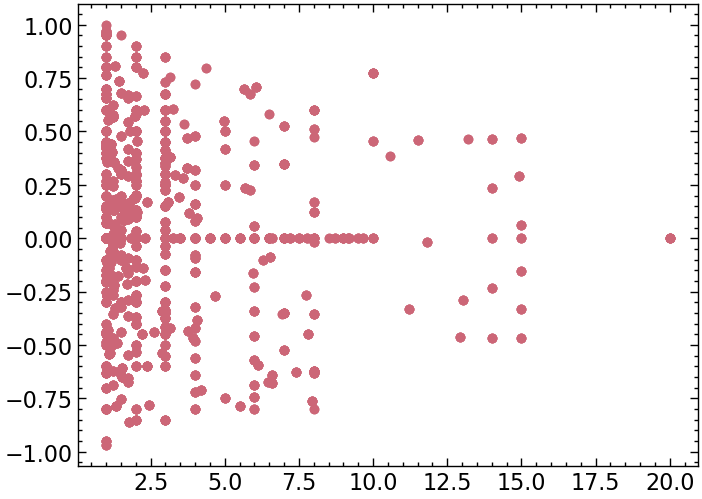

In [330]:
plt.scatter(df['q'], df['chi_eff_rounded'])

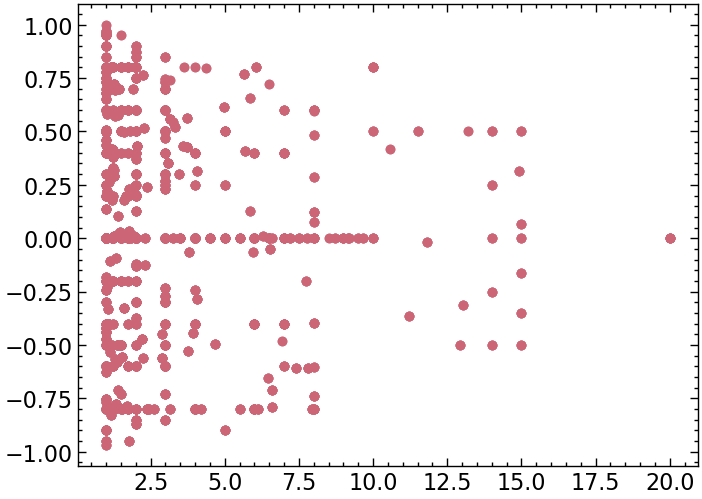

In [331]:
plt.scatter(df['q'], df['chi1z'])

In [332]:
plt.scatter(df[df['is_reference'] == True]['q'], df[df['is_reference'] == True]['chi1z'])

In [333]:
plt.scatter(df[df['is_reference'] == True]['chi1z'], df[df['is_reference'] == True]['chi2z'])

In [334]:
def load_hybrid_h5_file(hybrid_file, return_metadata=False):
    with h5py.File(hybrid_file, 'r') as f:
        hybrid_metadata = list(f.attrs.items())+[('filename', hybrid_file)]

        times = f['times'][:]
        hlms={}
        for l,m in f.attrs['modes']:
            hlms[l,m] = f[f"hlm_l{l}_m{m}"][:]

        hybrid_wf = prim.waveform.Waveform(times, hlms)

    if return_metadata:
        return hybrid_metadata, hybrid_wf
    else:
        return hybrid_wf

In [335]:
df.loc[0,'filepath']

'/scratch/sebastian.khan/data/ppmHM_2024_11_11/SXS_BBH_2212-Lev3__SEOBNRv5HM.h5'

In [350]:
df.sort_values(by='q_rounded', ascending=False).iloc[0]['ID']

327

In [351]:
# ID = 6
ID = df.sort_values(by='q_rounded', ascending=False).iloc[0]['ID']
df.query(f"(ID == {ID}) and (is_reference == True)")

approximant     chi1z     chi2z  is_reference  \
2386  SEOBNRv5HM  0.000034 -0.000102          True   

                                                  modes          q  \
2386  [[2 2]\n [2 1]\n [3 3]\n [3 2]\n [4 4]\n [4 3]...  19.996309   

           sxs_sim_name                                           filepath  \
2386  SXS:BBH:2516/Lev4  /scratch/sebastian.khan/data/ppmHM_2024_11_11/...   

                        hybrid_name  q_rounded  chi1z_rounded  chi2z_rounded  \
2386  SXS_BBH_2516-Lev4__SEOBNRv5HM     19.996            0.0           -0.0   

       chi_eff  chi_eff_rounded   ID  
2386  0.000028              0.0  327

In [352]:
hwfs=[]
for filepath in df.query(f"ID == {ID}")['filepath']:
    hwf = load_hybrid_h5_file(filepath)
    hwfs.append(hwf)

Text(0.5, 1.0, '                        hybrid_name  q_rounded  chi1z_rounded  chi2z_rounded\n2386  SXS_BBH_2516-Lev4__SEOBNRv5HM     19.996            0.0           -0.0')

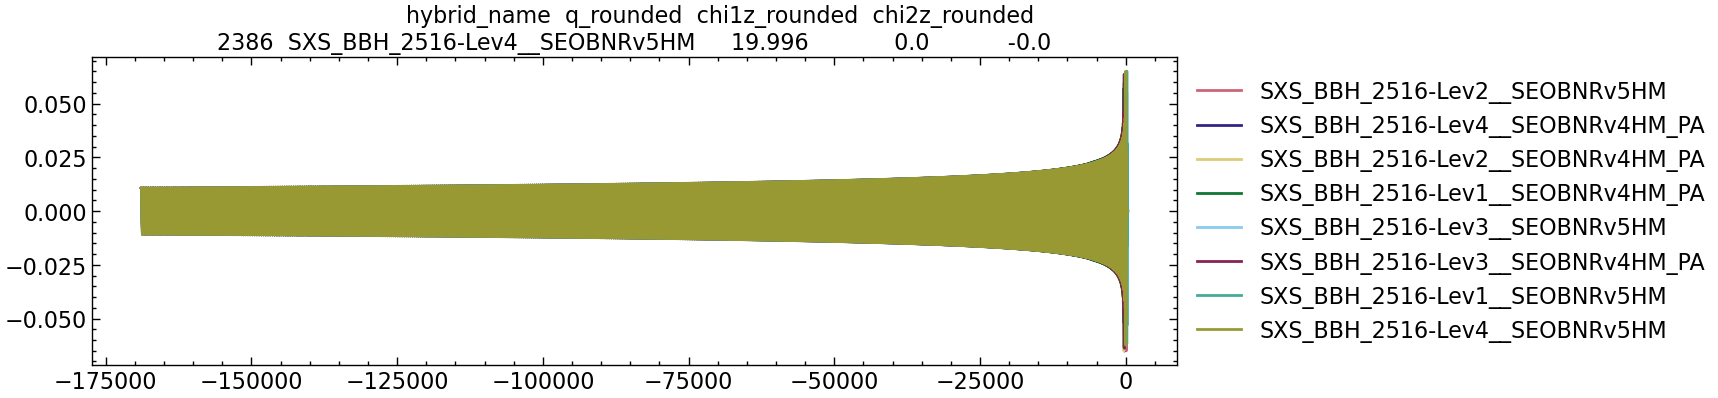

In [353]:
plt.figure(figsize=(14, 4))
for i, hwf in enumerate(hwfs):
    plt.plot(hwf.times, hwf.hlms[2,2].real, label=df.query(f"ID == {ID}")['hybrid_name'].values[i])
    # plt.xlim(-1000, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(df.query(f"(ID == {ID}) and (is_reference == True)")[['hybrid_name','q_rounded','chi1z_rounded','chi2z_rounded']])
# plt.xlim(-1000, 150)

(-9000.0, 150.0)

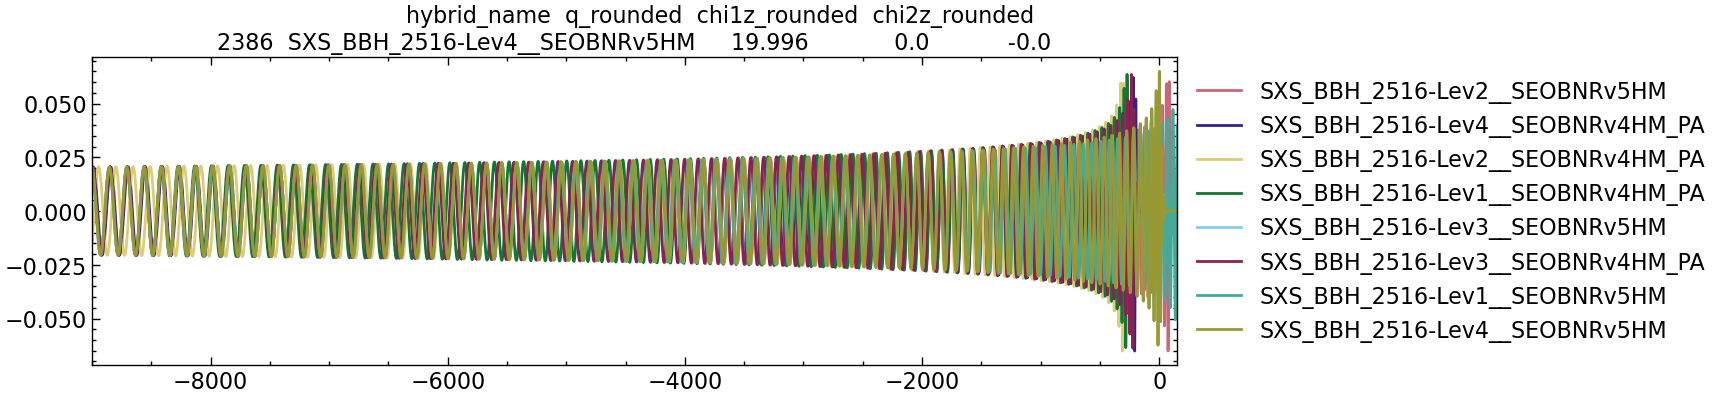

In [354]:
plt.figure(figsize=(14, 4))
for i, hwf in enumerate(hwfs):
    plt.plot(hwf.times, hwf.hlms[2,2].real, label=df.query(f"ID == {ID}")['hybrid_name'].values[i])
    # plt.xlim(-1000, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(df.query(f"(ID == {ID}) and (is_reference == True)")[['hybrid_name','q_rounded','chi1z_rounded','chi2z_rounded']])
plt.xlim(-9000, 150)

In [355]:
plt.figure(figsize=(14, 4))
for i, hwf in enumerate(hwfs):
    plt.plot(hwf.times, hwf.hlms[2,2].real, label=df.query(f"ID == {ID}")['hybrid_name'].values[i])
    # plt.xlim(-1000, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(df.query(f"(ID == {ID}) and (is_reference == True)")[['hybrid_name','q_rounded','chi1z_rounded','chi2z_rounded']])
plt.xlim(-1000, 150)

(-1000.0, 150.0)